In this project, our first objective was to take data from the CPD regarding police brutality as well as socioeconomic data on the 77 Chicago community areas. Using this data we attempt to build a predictive model that would predict brutality rates per 1000 people in any Chicago community. We also build a predictive model of the hardship index for each of the communities. Our hypothesis is that the data will build a good predictive model for the hardship index and a poor one for the brutality rates; atleast we hope so, since brutality rates should not be corelated to the socioeconomic status of the communtities.

For this project we will utilize python libraries to prepare our data as well as train and test the model.

To begin, import the libraries that will be required for the task.

In [52]:
import pandas as pd
from autograd import numpy as np
from sklearn import linear_model
from sklearn import datasets
import matplotlib.pyplot as plt

Get the socioeconomic data and police brutality counts from the respective files:

In [53]:
economic_df = pd.read_csv("Socioeconomic_DATA.csv")
police_brutality_df = pd.read_csv("labeled_income_brutality.csv")

Here, the to datasets are merged using the community name as the key. Population data is also read in to help normalize the brutality count to brutality rate per 1000 people. All three tables are merged to create the final dataframe that we will work with.

In [54]:
economic_vs_brutality_df = economic_df.merge(police_brutality_df, left_on='COMMUNITY AREA NAME', right_on='COMMUNITY AREA NAME', how='left')
population_df = pd.read_csv("population.csv")
df = economic_vs_brutality_df.merge(population_df, left_on='COMMUNITY AREA NAME', right_on='COMMUNITY AREA NAME', how='left')
df['normalized brutality'] = (df['sum_police_brutality_count'].astype(float) / df['2010'].astype(float)) * 1000

After doing some final data preprocessing we grab the training data which is broken down to the training data, hardship index values and the police brutality rates. The training data is made up of six attributes: Percent of housing crowded, Percent of households below poverty, Percent aged 16+ unemployed, Percent aged 25+ without high school diploma, Percent aged under 18 or over 64, and Per capita income.

In [55]:
df = df.drop(['Community Area Number', 'COMMUNITY AREA NAME', '2010', 'sum_police_brutality_count'], axis=1)
cols = [col for col in df.columns if col not in ['normalized brutality', 'HARDSHIP INDEX']]
# x = df.loc[:, df.columns != 'normalized brutality', df.columns != 'HARDSHIP INDEX'].values
print(list(df))
print(list(df[cols]))
x = df[cols]
y_hardship = df[df.columns[-2]].values
y_brutality = df[df.columns[-1]].values
print(x.shape)
print(y_hardship.shape)
print(y_brutality.shape)


['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ', 'HARDSHIP INDEX', 'normalized brutality']
['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ']
(77, 6)
(77,)
(77,)


In [56]:
print(list(df));

['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ', 'HARDSHIP INDEX', 'normalized brutality']


To understand our data let's generate some sample plots to see how our two target predictions (brutality rates and hardship index) relate to the data.

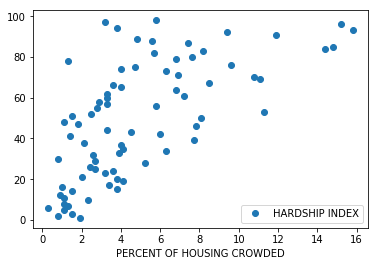

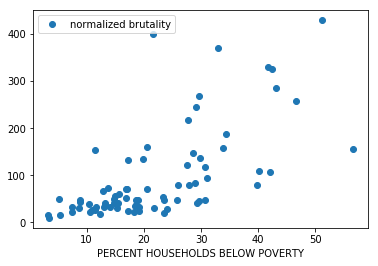

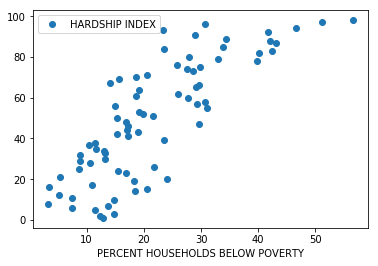

In [57]:
df.plot(x='PERCENT OF HOUSING CROWDED', y='HARDSHIP INDEX', style='o');
df.plot(x='PERCENT HOUSEHOLDS BELOW POVERTY', y='normalized brutality', style='o');
df.plot(x='PERCENT HOUSEHOLDS BELOW POVERTY', y='HARDSHIP INDEX', style='o');

Through data preprocessing, we can already see that our data appears to have linear correlation to the hardship index and not to the brutality rates. 

Below, we split the data into the training and testing parts.

In [58]:
x_train = x[:-10]
x_test = x[-10:]
y_brutality_train = y_brutality[:-10]
y_brutality_test = y_brutality[-10:]
y_hardship_train = y_hardship[:-10]
y_hardship_test = y_hardship[-10:]

We then train, score and predict one sample with each of our two predictive linear models.

In [59]:
brutality_regr = linear_model.LinearRegression()
brutality_regr.fit(x_train, y_brutality_train)
# print(brutality_regr.coef_)

hardship_regr = linear_model.LinearRegression()
hardship_regr.fit(x_train, y_hardship_train)
# print(hardship_regr.coef_)

np.mean((brutality_regr.predict(x_test) - y_brutality_test)**2)
print("The model score for the brutality rates is: ", brutality_regr.score(x_test, y_brutality_test)) # value closer to 1 indicates a good prediction model


np.mean((hardship_regr.predict(x_test) - y_hardship_test)**2)
print("The model score for the hardship index: ", hardship_regr.score(x_test, y_hardship_test)) # value closer to 1 indicates a good prediction model

The model score for the brutality rates is:  0.7187677004508944
The model score for the hardship index:  0.982399140519935


As shown above, the predictive model for the hardship index based on socioeconomic status of community areas performs very well achieving an accuracy of about 98% on the test data. The predictive model for police brutality rates on the other hand performs poorly scoring an accuracy of only 91%. 

A few insights can help understand why a linear regression model performs great for one of the target outputs but not the other. The hardship index, as defined above, is a measure that is closely correlated with the hardship index. Thus it would make sense that with the correct tuning of the weights, which for our 6 variables, our models ends up with the coefficients we produced, a linear model can predict the output variable y (hardship index), provided with the right attributes. Police brutality on the other hand, should hopefully have no correlation to the socioeconomic status of community areas since they should operate fairly across the board. Thus it makes sense that a predictive model built on socioeconomic data attributes cannot predict the police brutality rates since the two have no close correlation.